<a href="https://colab.research.google.com/github/carson-edmonds/AAI-521-Sports-Image-Classification/blob/main/Dataset_Pre_Processing.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [4]:
!pip install -q kaggle
import numpy as np
import matplotlib.pyplot as plt
import cv2
import os
import requests
from PIL import Image
from io import BytesIO
import random
import pickle
from sklearn.model_selection import train_test_split

In [2]:
!pip install -q patool
import patoolib

In [ ]:
from google.colab import files
# get api key from kaggle
# upload kaggle.json that was generated from kaggle
files.upload()

! mkdir ~/.kaggle

! cp kaggle.json ~/.kaggle/
! chmod 600 ~/.kaggle/kaggle.json
! kaggle datasets download -d rishikeshkonapure/sports-image-dataset/
! mkdir kaggle_data
! unzip /content/sports-image-dataset.zip -d kaggle_data

In [4]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [1]:
data_dir = '/content/kaggle_data/data'

In [ ]:
#pre-process resize, etc.

In [2]:
categories = ["badminton", "baseball", "basketball", "boxing",
                "chess", "cricket", "fencing", "football", "formula1",
                "gymnastics", "hockey", "ice_hockey", "kabaddi", "motogp",
                "shooting", "swimming", "table_tennis", "tennis", "volleyball",
                "weight_lifting", "wrestling", "wwe"]

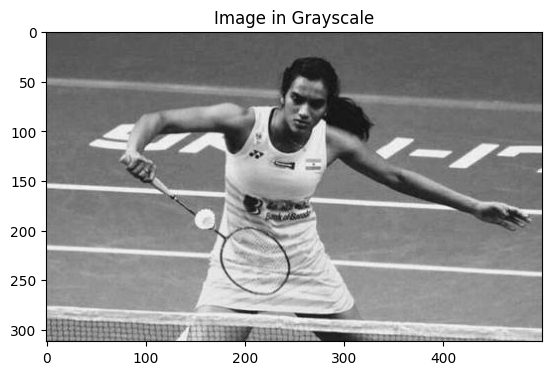

In [5]:
for i in categories:
    path = os.path.join(data_dir,i)
    for img in os.listdir(path):
        img_array = cv2.imread(os.path.join(path,img),cv2.IMREAD_GRAYSCALE)
        plt.imshow(img_array,cmap='gray')
        plt.title('Image in Grayscale')
        plt.show()
        break
    break

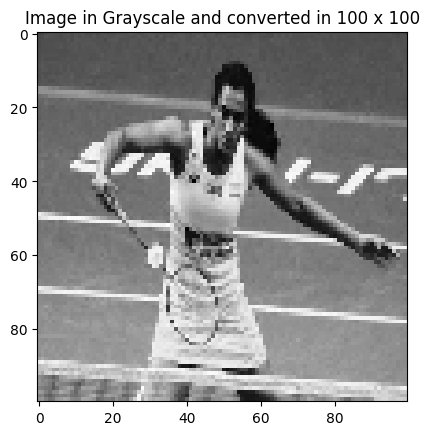

In [6]:
img_size = 100

new_array = cv2.resize(img_array,(img_size,img_size)) # resize images with grayscale into 100 * 100
plt.imshow(new_array,cmap='gray')
plt.title('Image in Grayscale and converted in 100 x 100')
plt.show()

In [7]:
#create training data

training_data =[]

def create_training_data():
    for i in categories:

        path = os.path.join(data_dir,i) #create path to sports types
        class_num = categories.index(i) #get the classification (indexing each category)

#check if any images are currupted
#if any skip the image
        for img in os.listdir(path):
            try:
                img_array = cv2.imread(os.path.join(path,img),cv2.IMREAD_GRAYSCALE)
                new_array2 = cv2.resize(img_array,(img_size,img_size))
                training_data.append([new_array2,class_num])

            except Exception as e:
                pass

create_training_data()
print(len(training_data))

14271


In [8]:
#shuffle all the training data
random.shuffle(training_data)
for sample in training_data[:5]:
    print(sample) #print first 5

[array([[ 46,  41,  43, ...,  54,  81,  96],
       [ 44,  38,  39, ...,  89,  82,  82],
       [ 42,  36,  44, ...,  92,  85,  82],
       ...,
       [162, 166, 157, ..., 128, 129, 120],
       [155, 160, 152, ..., 123, 120, 120],
       [144, 160, 147, ..., 117, 119, 118]], dtype=uint8), 17]
[array([[165, 224, 231, ...,  69, 103, 108],
       [180, 224, 226, ...,  51,  97,  79],
       [168, 227, 233, ...,  45,  95,  21],
       ...,
       [ 80,  49,  42, ..., 193, 191, 182],
       [157, 165, 171, ..., 167, 155, 134],
       [187, 190, 190, ..., 206, 213, 205]], dtype=uint8), 2]
[array([[ 84,  93, 102, ..., 101,  99,  99],
       [ 84,  94, 102, ..., 105, 102, 100],
       [ 90,  99, 102, ..., 108, 104, 102],
       ...,
       [ 61,  64,  64, ...,  62,  60,  63],
       [ 60,  62,  63, ...,  68,  62,  59],
       [ 60,  63,  63, ...,  61,  62,  59]], dtype=uint8), 10]
[array([[ 32,  33,  35, ...,  41,  29,  34],
       [ 33,  34,  35, ...,  39,  42,  30],
       [ 34,  34,  34, .

In [9]:
#creating lable and features

x=[] #features
y=[] #label
#y = np.array(y)

for features,label in training_data:
    x.append(features)
    y.append(label)
    np.array((y, label))

print("Before converting into numpy array:")
print(x[0].reshape(-1,img_size,img_size,1))

x=np.array(x).reshape(-1,img_size,img_size,1)

print("After converting into numpy array:")
print(np.array(x).reshape(-1,img_size,img_size,1))

<ipython-input-9-71265e5ccbce>:10: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  np.array((y, label))


Before converting into numpy array:
[[[[ 46]
   [ 41]
   [ 43]
   ...
   [ 54]
   [ 81]
   [ 96]]

  [[ 44]
   [ 38]
   [ 39]
   ...
   [ 89]
   [ 82]
   [ 82]]

  [[ 42]
   [ 36]
   [ 44]
   ...
   [ 92]
   [ 85]
   [ 82]]

  ...

  [[162]
   [166]
   [157]
   ...
   [128]
   [129]
   [120]]

  [[155]
   [160]
   [152]
   ...
   [123]
   [120]
   [120]]

  [[144]
   [160]
   [147]
   ...
   [117]
   [119]
   [118]]]]
After converting into numpy array:
[[[[ 46]
   [ 41]
   [ 43]
   ...
   [ 54]
   [ 81]
   [ 96]]

  [[ 44]
   [ 38]
   [ 39]
   ...
   [ 89]
   [ 82]
   [ 82]]

  [[ 42]
   [ 36]
   [ 44]
   ...
   [ 92]
   [ 85]
   [ 82]]

  ...

  [[162]
   [166]
   [157]
   ...
   [128]
   [129]
   [120]]

  [[155]
   [160]
   [152]
   ...
   [123]
   [120]
   [120]]

  [[144]
   [160]
   [147]
   ...
   [117]
   [119]
   [118]]]


 [[[165]
   [224]
   [231]
   ...
   [ 69]
   [103]
   [108]]

  [[180]
   [224]
   [226]
   ...
   [ 51]
   [ 97]
   [ 79]]

  [[168]
   [227]
   [233]
   

In [ ]:
#Optional Save the x and y

In [19]:
#dumping data into pickle file
#x_location = '/content/drive/MyDrive/Final_Project_AAI_521/data/x.pickle'
#y_location = '/content/drive/MyDrive/Final_Project_AAI_521/data/y.pickle'

#pickle file for features
#pickle_out = open(x_location,"wb") #path to save pickle file
#pickle.dump(x,pickle_out)
#pickle_out.close()

#pickle file for label
#pickle_out = open(y_location,"wb") #path to save pickle file
#pickle.dump(y,pickle_out)
#pickle_out.close()

In [20]:
#importing data (pickle) files x and y
#pickle_in = open(x_location,"rb")   #rb - read binary form #wb - Write binary form
#x = pickle.load(pickle_in)


#pickle_in = open(y_location,"rb")   #rb - read binary form #wb - Write binary form
#y = pickle.load(pickle_in)

In [10]:
y = np.array(y)
x = x/255.0
#print(x)

In [11]:
#create a split of data for the model fit and training
train_x,test_x,train_y,test_y = train_test_split(x,y,test_size=0.2)

In [12]:
print(train_x.shape)
print(test_x.shape)
print(train_y.shape)
print(test_y.shape)

(11416, 100, 100, 1)
(2855, 100, 100, 1)
(11416,)
(2855,)
